# classification between benign disease and malignant disease

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers,losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
PATH = './skin-cancer/data/'

train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'test')

train_benign_dir = os.path.join(train_dir, 'benign')
train_malignant_dir = os.path.join(train_dir, 'malignant')
test_benign_dir = os.path.join(test_dir, 'benign')
test_malignant_dir = os.path.join(test_dir, 'malignant')

In [12]:
train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=128,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(224, 224),
                                                           class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(batch_size=128,
                                                         directory=test_dir,
                                                         target_size=(224, 224),
                                                         class_mode='binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [13]:
train_data_gen.image_shape


(224, 224, 3)

In [14]:
def plot_images(img_arr):
    fig, axes = plt.subplots(1, 5, figsize=(25, 25))
    axes = axes.flatten()
    for img, ax in zip(img_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

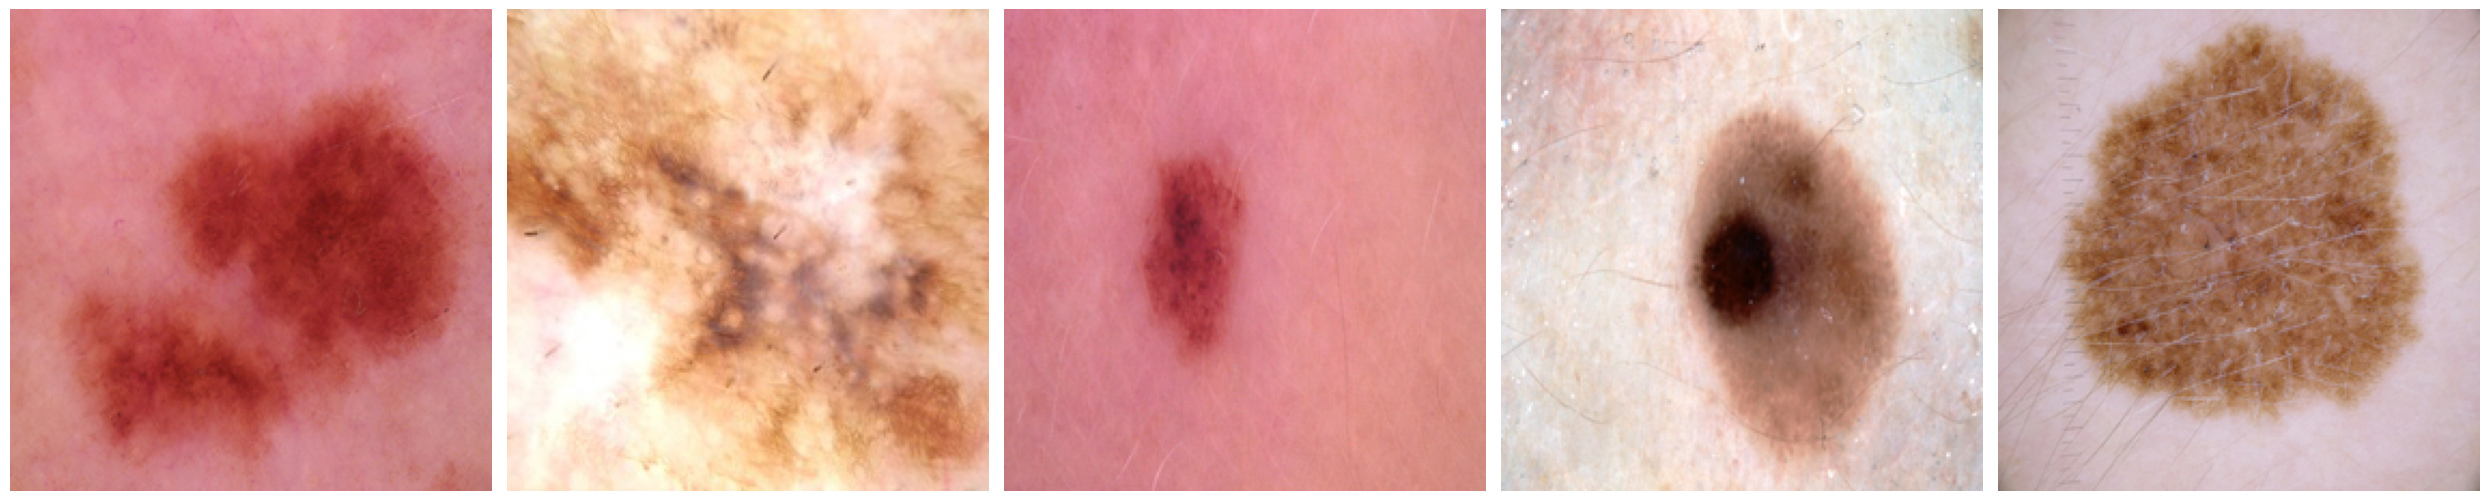

In [15]:
sample_training_images, _ = next(train_data_gen)

plot_images(sample_training_images[:5])

In [16]:
model = Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(.2),
    layers.Dense(1, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam', loss=losses.BinaryCrossentropy(), metrics=['accuracy'])


In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [19]:
total_train_size = len(os.listdir(train_benign_dir)) + len(os.listdir(train_malignant_dir))
total_test_size = len(os.listdir(test_benign_dir)) + len(os.listdir(test_malignant_dir))


In [20]:
history = model.fit(train_data_gen,
         batch_size=128,
         epochs=5,
         steps_per_epoch=total_train_size // 128,
         validation_data=test_data_gen,
         validation_steps=total_test_size // 128)

Epoch 1/5
20/20 [==============================] - 100s 5s/step - loss: 0.8981 - accuracy: 0.5935 - val_loss: 0.6607 - val_accuracy: 0.6906
Epoch 2/5
20/20 [==============================] - 83s 4s/step - loss: 0.5320 - accuracy: 0.7174 - val_loss: 0.4424 - val_accuracy: 0.7828
Epoch 3/5
20/20 [==============================] - 89s 4s/step - loss: 0.5014 - accuracy: 0.7469 - val_loss: 0.4380 - val_accuracy: 0.7516
Epoch 4/5
20/20 [==============================] - 89s 4s/step - loss: 0.4330 - accuracy: 0.7796 - val_loss: 0.4116 - val_accuracy: 0.7891
Epoch 5/5
20/20 [==============================] - 88s 4s/step - loss: 0.4201 - accuracy: 0.8031 - val_loss: 0.4020 - val_accuracy: 0.7875


In [21]:
history.history


{'loss': [0.8980517983436584,
  0.5320218205451965,
  0.5014343857765198,
  0.43298977613449097,
  0.4200800061225891],
 'accuracy': [0.5934635400772095,
  0.717417299747467,
  0.7469111084938049,
  0.7795934677124023,
  0.803108811378479],
 'val_loss': [0.6607216596603394,
  0.4423910081386566,
  0.4380008280277252,
  0.41158729791641235,
  0.4019818902015686],
 'val_accuracy': [0.690625011920929,
  0.7828124761581421,
  0.7515624761581421,
  0.7890625,
  0.7875000238418579]}

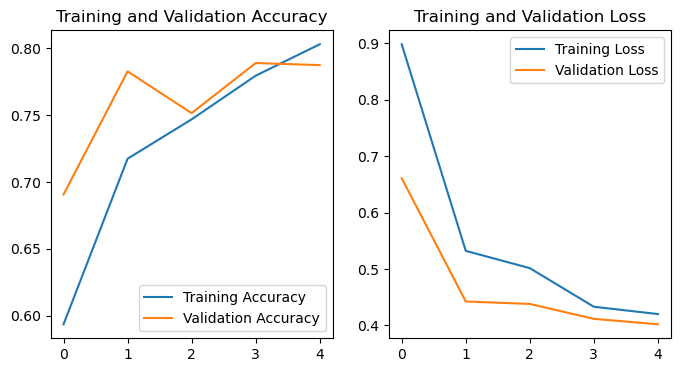

In [22]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()